<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [44]:
import keras,os
from keras.models import Sequential, Model   # M
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import GlobalAveragePooling2D,Dropout  #
from keras.preprocessing.image import ImageDataGenerator

from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.optimizers import Adam, RMSprop

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import os

In [46]:
trdata = ImageDataGenerator(rescale=1./255,
                           rotation_range=20, 
                            zoom_range=0.15,
                            width_shift_range=0.2, 
                            height_shift_range=0.2, 
                            shear_range=0.15,
                            horizontal_flip=True, 
                            fill_mode="nearest")
#                             rotation_range=40,
#                            width_shift_range=0.2,
#                            height_shift_range=0.2,
#                            shear_range=0.2,
#                            zoom_range=0.2,
#                            horizontal_flip=True, 
                            
traindata = trdata.flow_from_directory(directory="D:/kvasir-dataset-v2/train_data",target_size=(224,224))

Found 6400 images belonging to 8 classes.


In [47]:
tsdata = ImageDataGenerator(rescale = 1./255)
testdata = trdata.flow_from_directory(directory="D:/kvasir-dataset-v2/test_data",target_size=(224,224))

Found 1600 images belonging to 8 classes.


In [48]:
from keras.applications import ResNet50
RN = ResNet50(input_shape=(224,224,3),include_top=False,weights='imagenet')

C:\Users\Vipooshan\anaconda3\envs\GPU\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [49]:
def print_layer_trainable(model):
    for layer in model.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [50]:
print_layer_trainable(RN)

False:	input_2
True:	conv1_pad
True:	conv1
True:	bn_conv1
True:	activation_50
True:	pool1_pad
True:	max_pooling2d_2
True:	res2a_branch2a
True:	bn2a_branch2a
True:	activation_51
True:	res2a_branch2b
True:	bn2a_branch2b
True:	activation_52
True:	res2a_branch2c
True:	res2a_branch1
True:	bn2a_branch2c
True:	bn2a_branch1
True:	add_17
True:	activation_53
True:	res2b_branch2a
True:	bn2b_branch2a
True:	activation_54
True:	res2b_branch2b
True:	bn2b_branch2b
True:	activation_55
True:	res2b_branch2c
True:	bn2b_branch2c
True:	add_18
True:	activation_56
True:	res2c_branch2a
True:	bn2c_branch2a
True:	activation_57
True:	res2c_branch2b
True:	bn2c_branch2b
True:	activation_58
True:	res2c_branch2c
True:	bn2c_branch2c
True:	add_19
True:	activation_59
True:	res3a_branch2a
True:	bn3a_branch2a
True:	activation_60
True:	res3a_branch2b
True:	bn3a_branch2b
True:	activation_61
True:	res3a_branch2c
True:	res3a_branch1
True:	bn3a_branch2c
True:	bn3a_branch1
True:	add_20
True:	activation_62
True:	res3b_branch2a
T

In [51]:
RN.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [52]:
custom_resnet_model = Sequential()
model = keras.Sequential([
    RN,
    keras.layers.Flatten(),
    keras.layers.Dense(units=8,activation="softmax")
])

model.layers[0].trainable = False

In [53]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 802824    
Total params: 24,390,536
Trainable params: 802,824
Non-trainable params: 23,587,712
_________________________________________________________________


In [54]:
for layer in model.layers[:-1]:
    layer.trainable = False


In [55]:
model.layers[-1].trainable

True

In [56]:
print_layer_trainable(model)

False:	resnet50
False:	flatten_2
True:	dense_2


In [57]:
from tensorflow.python.keras import optimizers

model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [58]:
import time
t=time.time()

In [59]:
hist = model.fit_generator(steps_per_epoch=400,generator=traindata, validation_data=testdata, validation_steps=120, epochs=10)

Epoch 1/10
400/400 [==============================] - 595s 1s/step - loss: 0.8889 - accuracy: 0.7583 - val_loss: 2.3890 - val_accuracy: 0.1086
Epoch 2/10
400/400 [==============================] - 589s 1s/step - loss: 0.7213 - accuracy: 0.8302 - val_loss: 3.4501 - val_accuracy: 0.1229
Epoch 3/10
400/400 [==============================] - 9833s 25s/step - loss: 0.6423 - accuracy: 0.8473 - val_loss: 3.7438 - val_accuracy: 0.1234
Epoch 4/10
400/400 [==============================] - 575s 1s/step - loss: 0.6397 - accuracy: 0.8580 - val_loss: 4.0647 - val_accuracy: 0.1229
Epoch 5/10
400/400 [==============================] - 587s 1s/step - loss: 0.6292 - accuracy: 0.8628 - val_loss: 4.4658 - val_accuracy: 0.1271
Epoch 6/10
400/400 [==============================] - 596s 1s/step - loss: 0.6023 - accuracy: 0.8741 - val_loss: 6.3842 - val_accuracy: 0.1245
Epoch 7/10
400/400 [==============================] - 553s 1s/step - loss: 0.5969 - accuracy: 0.8790 - val_loss: 5.4225 - val_accuracy: 0.12

In [60]:
print('Training time: %s' % (t - time.time()))

Training time: -15024.301186323166


In [61]:
model_file= 'RN50_1.h5'
model.save(model_file)

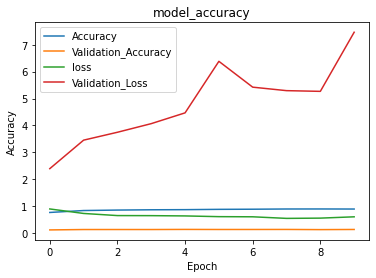

In [62]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation_Accuracy","loss","Validation_Loss"])
#plt.axis([0,5,0,3])
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix

def print_confusion_matrix(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_test,  # True class for test-set.
                          y_pred=cls_pred)  # Predicted class.

    print("Confusion matrix:")
    
    # Print the confusion matrix as text.
    print(cm)
    
    # Print the class-names for easy reference.
    for i, class_name in enumerate(class_names):
        print("({0}) {1}".format(i, class_name))

In [64]:
def plot_images(images, cls_true, cls_pred=None, smooth=True):

    assert len(images) == len(cls_true)

    # Create figure with sub-plots.
    fig, axes = plt.subplots(3, 3)

    # Adjust vertical spacing.
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    # Interpolation type.
    if smooth:
        interpolation = 'spline16'
    else:
        interpolation = 'nearest'

    for i, ax in enumerate(axes.flat):
        # There may be less than 9 images, ensure it doesn't crash.
        if i < len(images):
            # Plot image.
            ax.imshow(images[i],
                      interpolation=interpolation)

            # Name of the true class.
            cls_true_name = class_names[cls_true[i]]

            # Show true and predicted classes.
            if cls_pred is None:
                xlabel = "True: {0}".format(cls_true_name)
            else:
                # Name of the predicted class.
                cls_pred_name = class_names[cls_pred[i]]

                xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)

            # Show the classes as the label on the x-axis.
            ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [65]:
def plot_example_errors(cls_pred):
    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Boolean array whether the predicted class is incorrect.
    incorrect = (cls_pred != cls_test)

    # Get the file-paths for images that were incorrectly classified.
    image_paths = np.array(image_paths_test)[incorrect]

    # Load the first 9 images.
    images = load_images(image_paths=image_paths[0:9])
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = cls_test[incorrect]
    
    # Plot the 9 images we have loaded and their corresponding classes.
    # We have only loaded 9 images so there is no need to slice those again.
    plot_images(images=images,
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [66]:
def example_errors():
    # The Keras data-generator for the test-set must be reset
    # before processing. This is because the generator will loop
    # infinitely and keep an internal index into the dataset.
    # So it might start in the middle of the test-set if we do
    # not reset it first. This makes it impossible to match the
    # predicted classes with the input images.
    # If we reset the generator, then it always starts at the
    # beginning so we know exactly which input-images were used.
    testdata.reset()
    
    # Predict the classes for all images in the test-set.
    y_pred = model.predict(testdata, steps=testdata.n / 32)

    # Convert the predicted classes from arrays to integers.
    cls_pred = np.argmax(y_pred,axis=1)

    # Plot examples of mis-classified images.
    plot_example_errors(cls_pred)
    
    # Print the confusion matrix.
    print_confusion_matrix(cls_pred)

In [67]:
def path_join(dirname, filenames):
    return [os.path.join(dirname, filename) for filename in filenames]

In [68]:
def load_images(image_paths):
    # Load the images from disk.
    images = [plt.imread(path) for path in image_paths]

    # Convert to a numpy array and return it.
    return np.asarray(images)

In [69]:
train_dir = "D:/kvasir-dataset-v2/train_data"
test_dir = "D:/kvasir-dataset-v2/test_data"

In [70]:
image_paths_train = path_join(train_dir, traindata.filenames)
image_paths_test = path_join(test_dir, testdata.filenames)

In [71]:
cls_test = testdata.classes
cls_train = traindata.classes

In [72]:
class_names = list(traindata.class_indices.keys())
class_names

['dyed-lifted-polyps',
 'dyed-resection-margins',
 'esophagitis',
 'normal-cecum',
 'normal-pylorus',
 'normal-z-line',
 'polyps',
 'ulcerative-colitis']

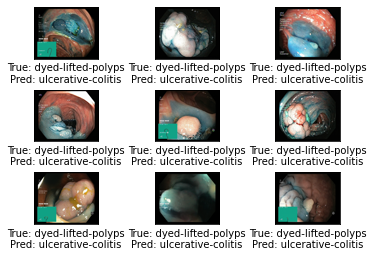

Confusion matrix:
[[  0  12   0   0   0  20   0 168]
 [  0   8   0   0   0  18   0 174]
 [  0   3   0   0   0  34   0 163]
 [  0  11   0   0   0  25   0 164]
 [  0   8   0   0   0  20   0 172]
 [  0   8   0   0   0  30   0 162]
 [  0   6   0   0   0  22   0 172]
 [  0   5   0   0   0  26   0 169]]
(0) dyed-lifted-polyps
(1) dyed-resection-margins
(2) esophagitis
(3) normal-cecum
(4) normal-pylorus
(5) normal-z-line
(6) polyps
(7) ulcerative-colitis


In [73]:
example_errors()

In [74]:
# from keras.preprocessing import image
# img = image.load_img("D:/00fb1871-41c0-4619-be56-29690d145b1d.jpg" ,target_size=(224,224))
# img = np.asarray(img)
# plt.imshow(img)
# img = np.expand_dims(img, axis=0)
## img = keras.applications.vgg16.preprocess_input(x)

In [75]:
# from keras.models import load_model
# saved_model = load_model(model_file)
# output = saved_model.predict(img)

In [76]:
# label = ["1-dyed-lifted-polyps","2-dyed-resection-margins","3-esophagitis","4-normal-cecum","5-normal-pylorus","6-normal-z-line","7-polyps","8-ulcerative-colitis"]
# print(output)

In [77]:
# print(label[output[0].argmax()])

<font size="6">Fine-Tuning</font>

In [78]:
def print_layer_trainable():
    for layer in RN.layers:
        print("{0}:\t{1}".format(layer.trainable, layer.name))

In [79]:
RN.trainable = True

In [80]:
for layer in model.layers[:172]:
   layer.trainable = False
for layer in model.layers[172:]:
   layer.trainable = True

In [81]:
print_layer_trainable()

False:	input_2
True:	conv1_pad
True:	conv1
True:	bn_conv1
True:	activation_50
True:	pool1_pad
True:	max_pooling2d_2
True:	res2a_branch2a
True:	bn2a_branch2a
True:	activation_51
True:	res2a_branch2b
True:	bn2a_branch2b
True:	activation_52
True:	res2a_branch2c
True:	res2a_branch1
True:	bn2a_branch2c
True:	bn2a_branch1
True:	add_17
True:	activation_53
True:	res2b_branch2a
True:	bn2b_branch2a
True:	activation_54
True:	res2b_branch2b
True:	bn2b_branch2b
True:	activation_55
True:	res2b_branch2c
True:	bn2b_branch2c
True:	add_18
True:	activation_56
True:	res2c_branch2a
True:	bn2c_branch2a
True:	activation_57
True:	res2c_branch2b
True:	bn2c_branch2b
True:	activation_58
True:	res2c_branch2c
True:	bn2c_branch2c
True:	add_19
True:	activation_59
True:	res3a_branch2a
True:	bn3a_branch2a
True:	activation_60
True:	res3a_branch2b
True:	bn3a_branch2b
True:	activation_61
True:	res3a_branch2c
True:	res3a_branch1
True:	bn3a_branch2c
True:	bn3a_branch1
True:	add_20
True:	activation_62
True:	res3b_branch2a
T

In [82]:
optimizer_fine = Adam(lr=1e-7)

In [83]:
loss = 'categorical_crossentropy'
metrics = ['accuracy']

In [84]:
model.compile(optimizer=optimizer_fine, loss=loss, metrics=metrics)

In [85]:
#hist1 = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data=testdata, validation_steps=10, epochs=5)

hist1 = model.fit(x=traindata,
                        epochs=5,
                        steps_per_epoch=100,
                        #class_weight=class_weight,
                        validation_data=testdata,
                        validation_steps=60)

Epoch 1/15
100/100 [==============================] - 266s 3s/step - loss: 0.5870 - accuracy: 0.8856 - val_loss: 5.9875 - val_accuracy: 0.1156
Epoch 2/15
100/100 [==============================] - 100s 999ms/step - loss: 0.5486 - accuracy: 0.8997 - val_loss: 6.8610 - val_accuracy: 0.1500
Epoch 3/15
100/100 [==============================] - 121s 1s/step - loss: 0.5726 - accuracy: 0.8934 - val_loss: 6.3234 - val_accuracy: 0.1156
Epoch 4/15
100/100 [==============================] - 121s 1s/step - loss: 0.6440 - accuracy: 0.8850 - val_loss: 6.5647 - val_accuracy: 0.1094
Epoch 5/15
100/100 [==============================] - 120s 1s/step - loss: 0.6023 - accuracy: 0.8894 - val_loss: 6.4711 - val_accuracy: 0.1219
Epoch 6/15
100/100 [==============================] - 3298s 33s/step - loss: 0.6397 - accuracy: 0.8869 - val_loss: 6.3022 - val_accuracy: 0.1250
Epoch 7/15
100/100 [==============================] - 114s 1s/step - loss: 0.5912 - accuracy: 0.8959 - val_loss: 6.3454 - val_accuracy: 0

In [86]:
def plot_training_history(history):
    # Get the classification accuracy and loss-value
    # for the training-set.
    acc = history.history['accuracy']
    loss = history.history['loss']

    # Get it for the validation-set (we only use the test-set).
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    # Plot the accuracy and loss-values for the training-set.
    plt.plot(acc, linestyle='-', color='b', label='Training Acc.')
    plt.plot(loss, 'o', color='b', label='Training Loss')
    
    # Plot it for the test-set.
    plt.plot(val_acc, linestyle='--', color='r', label='Test Acc.')
    plt.plot(val_loss, 'o', color='r', label='Test Loss')

    # Plot title and legend.
    plt.title('Training and Test Accuracy')
    plt.legend()

    # Ensure the plot shows correctly.
    plt.show()



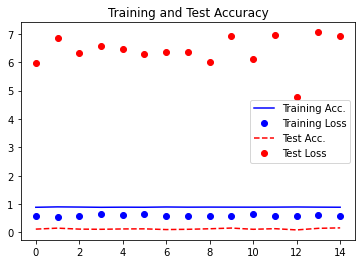

In [87]:
plot_training_history(hist1)

In [88]:
model.save('RN50_2.h5')

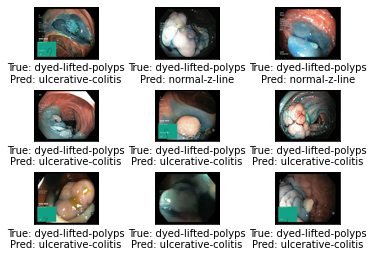

Confusion matrix:
[[  0   9   0   0   0  29   0 162]
 [  0   7   0   0   0  18   0 175]
 [  0  11   0   0   0  20   0 169]
 [  0   8   0   0   0  25   0 167]
 [  0   8   0   0   0  25   0 167]
 [  0   4   0   0   0  26   0 170]
 [  0  11   0   0   0  24   0 165]
 [  0   8   0   0   0  33   0 159]]
(0) dyed-lifted-polyps
(1) dyed-resection-margins
(2) esophagitis
(3) normal-cecum
(4) normal-pylorus
(5) normal-z-line
(6) polyps
(7) ulcerative-colitis


In [89]:
example_errors()

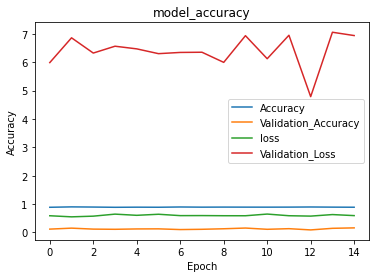

In [90]:
plt.plot(hist1.history["accuracy"])
plt.plot(hist1.history["val_accuracy"])
plt.plot(hist1.history["loss"])
plt.plot(hist1.history["val_loss"])
plt.title("model_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation_Accuracy","loss","Validation_Loss"])
plt.show()